# Imports

In [ ]:
!pip install --upgrade pyalgotrading

In [1]:
from pyalgotrading.algobulls import AlgoBullsConnection

# Connection

In [2]:
connection = AlgoBullsConnection()

In [3]:
connection.get_token_url()

Please login to this URL to get your unique token: https://app.algobulls.com/settings?section=developerOptions


In [4]:
API_TOKEN = "82db759698c15daf45f70abd9fc6998b694cc049"
connection.set_access_token(API_TOKEN)

# Strategy Creation

## Import Strategy from pyaglostrategypool

In [ ]:
! wget -O reverse_rsi_crossover.py https://raw.githubusercontent.com/algobulls/pyalgostrategypool/master/pyalgostrategypool/reverse_rsi_crossover.py
! sed -i '1s/^/from pyalgotrading.strategy import StrategyBase\n/' reverse_rsi_crossover.py

In [5]:
from reverse_rsi_crossover import ReverseRSICrossover as strategy_cls

In [6]:
response = connection.create_strategy(strategy_cls, overwrite=True)
response

{'message': 'Strategy saved successfully',
 'cstcId': 130129,
 'strategyId': '922030748bec41e1ad9e575b77e7b443'}

In [7]:
strategy = response['strategyId']

# Strategy Testing

## Instruments Searching (optional)

In [8]:
instrument = connection.search_instrument('AXISBANK', exchange='NSE')
instrument

[{'id': 16, 'value': 'NSE:AXISBANK'},
 {'id': 1672340, 'value': 'NSE:AXISBANK.AF'},
 {'id': 1672491, 'value': 'NSE:AXISBANK.BL'},
 {'id': 2316339, 'value': 'NSE:AXISBANK.L1'},
 {'id': 2040740, 'value': 'NSE:AXISBANK.R1'},
 {'id': 2040739, 'value': 'NSE:AXISBANK.V1'},
 {'id': 2726920, 'value': 'NSE:AXISBANK26OCT231000CE'},
 {'id': 2726921, 'value': 'NSE:AXISBANK26OCT231000PE'},
 {'id': 2726922, 'value': 'NSE:AXISBANK26OCT231010CE'},
 {'id': 2726923, 'value': 'NSE:AXISBANK26OCT231010PE'}]

## Setup Parameters

In [9]:
parameters = {
  'TIME_PERIOD': 10,
  'OVERBOUGHT_VALUE': 65,
    'OVERSOLD_VALUE': 35
}

In [10]:
initial_virtual_funds = 7000     # in Rupees

## Backtesting

### Start

In [11]:
connection.backtest(
    strategy=strategy, 
    start='2021-08-01 09:15 +0530', 
    end='2023-07-31 15:30 +0530', 
    instrument='NSE:AXISBANK', 
    lots=3,
    parameters=parameters, 
    candle='1 hour',
    initial_funds_virtual=initial_virtual_funds

)


Starting the strategy 'Reverse RSI' in BACKTESTING mode...
╒═════════════════════════╤═══════════════════════════════════════════════════════════════════╕
│ Config                  │ Value                                                             │
╞═════════════════════════╪═══════════════════════════════════════════════════════════════════╡
│ Strategy Name           │ Reverse RSI                                                       │
├─────────────────────────┼───────────────────────────────────────────────────────────────────┤
│ Trading Type            │ BACKTESTING                                                       │
├─────────────────────────┼───────────────────────────────────────────────────────────────────┤
│ Instrument(s)           │ ['NSE:AXISBANK']                                                  │
├─────────────────────────┼───────────────────────────────────────────────────────────────────┤
│ Quantity/Lots           │ 3                                               

### Status

In [12]:
connection.get_backtesting_job_status(strategy)

{'message': 'STOPPED', 'status': 0}

### Logs

In [13]:
logs = connection.get_backtesting_logs(strategy)

In [14]:
print(logs)

[2023-08-22 17:09:54] Performing sanity checks on cfg strategy_parameters, setting up required data structures...
[2023-08-22 17:09:54] Sanity checks on cfg successful.
[2023-08-22 17:09:54] Currency set to "INR"
[2023-08-22 17:09:54] Setting up broker connection...
[2023-08-22 17:09:56] Broker connection has been setup successfully.
[2023-08-22 17:09:56] (NSE_EQ) Funds available in client's ABVIRTUALBROKER account is : INR '7000.00'
[2023-08-22 17:09:56] 
########################################
 INITIALIZING ALGOBULLS CORE (v3.3.0)... 
########################################
[2023-08-22 17:09:56] Welcome ALGOBULLS VIRTUAL USER!
[2023-08-22 17:09:56] Reading strategy...
[2023-08-22 17:09:56] Entering Backtesting mode. Henceforth, all timestamps will be Backtesting timestamps...
[BT] [2021-08-01 09:15:00,000] [INFO] [tls] STARTING ALGOBULLS CORE...
[BT] [2021-08-01 09:15:00,000] [INFO] [tls] 
  #####  #######    #    ######  ####### ### #     #  #####     
 #     #    #      # #   #  

### Stop

In [15]:
connection.stop_backtesting_job(strategy)

Stopping BACKTESTING job... Success.


### Profit and Loss Reports

In [17]:
pnl_reports = connection.get_backtesting_report_pnl_table(strategy)
pnl_reports

instrument_segment instrument_tradingsymbol           entry_timestamp  \
0                  NSE                 AXISBANK 2021-08-02 10:15:00+05:30   
1                  NSE                 AXISBANK 2021-08-05 10:15:00+05:30   
2                  NSE                 AXISBANK 2021-08-05 14:15:00+05:30   
3                  NSE                 AXISBANK 2021-08-10 14:15:00+05:30   
4                  NSE                 AXISBANK 2021-08-11 09:15:00+05:30   
..                 ...                      ...                       ...   
260                NSE                 AXISBANK 2023-07-24 11:15:00+05:30   
261                NSE                 AXISBANK 2023-07-25 14:15:00+05:30   
262                NSE                 AXISBANK 2023-07-27 09:15:00+05:30   
263                NSE                 AXISBANK 2023-07-27 11:15:00+05:30   
264                NSE                 AXISBANK 2023-07-31 10:15:00+05:30   

    entry_transaction_type  entry_quantity entry_currency  entry_price  \
0                      BUY               3              ₹       723.00   
1                     SELL               3              ₹       746.95   
2                     SELL               3              ₹       752.50   
3                     SELL               3              ₹       758.70   
4                     SELL               3              ₹       765.00   
..                     ...             ...            ...          ...   
260                   SELL               3              ₹       976.40   
261                    BUY               3              ₹       960.20   
262                   SELL               3              ₹       989.35   
263                   SELL               3              ₹       974.00   
264                    BUY               3              ₹       954.30   

               exit_timestamp exit_transaction_type  exit_quantity  \
0   2021-08-02 15:30:00+05:30                  SELL              3   
1   2021-08-05 13:15:00+05:30                   BUY              3   
2   2021-08-05 15:30:00+05:30                   BUY              3   
3   2021-08-10 15:15:00+05:30                   BUY              3   
4   2021-08-11 15:30:00+05:30                   BUY              3   
..                        ...                   ...            ...   
260 2023-07-24 15:30:00+05:30                   BUY              3   
261 2023-07-25 15:30:00+05:30                  SELL              3   
262 2023-07-27 10:15:00+05:30                   BUY              3   
263 2023-07-27 15:30:00+05:30                   BUY              3   
264 2023-07-31 15:30:00+05:30                  SELL              3   

    exit_currency  exit_price  pnl_absolute  pnl_cumulative_absolute  
0               ₹      721.40         -4.80                    -4.80  
1               ₹      754.00        -21.15                   -25.95  
2               ₹      748.80         11.10                   -14.85  
3               ₹      762.00         -9.90                   -24.75  
4               ₹      760.95         12.15                   -12.60  
..            ...         ...           ...                      ...  
260             ₹      970.95         16.35                   237.45  
261             ₹      962.65          7.35                   244.80  
262             ₹      976.70         37.95                   282.75  
263             ₹      960.35         40.95                   323.70  
264             ₹      954.05         -0.75                   322.95  

[265 rows x 14 columns]

### Statistics Reports

#### Statistics

In [18]:
connection.get_backtesting_report_statistics(strategy, initial_funds=initial_virtual_funds)

Generating Statistics for already fetched P&L data...


/home/prithvirajgotepatil/projects/venvs/jupyter_us_env/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:482: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                    Strategy
------------------  ----------
Start Period        2021-08-02
End Period          2023-07-31
Risk-Free Rate      0.0%
Time in Market      83.0%

Cumulative Return   4.69%
CAGR﹪              2.32%

Sharpe              1.05
Prob. Sharpe Ratio  86.34%
Sortino             1.7
Sortino/√2          1.2
Omega               1.22

Max Drawdown        -3.72%
Longest DD Days     564

Gain/Pain Ratio     0.24
Gain/Pain (1M)      0.69

Payoff Ratio        1.24
Profit Factor       1.22
Common Sense Ratio  1.78
CPC Index           0.75
Tail Ratio          1.46
Outlier Win Ratio   4.51
Outlier Loss Ratio  3.52

MTD                 1.91%
3M                  3.54%
6M                  4.23%
YTD                 4.3%
1Y                  5.83%
3Y (ann.)           2.32%
5Y (ann.)           2.32%
10Y (ann.)          2.32%
All-time (ann.)     2.32%

Avg. Drawdown       -0.49%
Avg. Drawdown Days  52
Recovery Factor     1.26
Ulcer Index         0.02
Serenity Index      0.23


#### Quantstats Full Report

Generating Statistics for already fetched P&L data...


/home/prithvirajgotepatil/projects/venvs/jupyter_us_env/lib/python3.10/site-packages/pyalgotrading/algobulls/connection.py:482: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _returns_df['entry_timestamp'] = _returns_df['entry_timestamp'].dt.tz_localize(None)  # Note: Quantstats has a bug. It doesn't accept the df index, which is set below, with timezone. Hence, we have to drop the timezone info


                           Strategy
-------------------------  ----------
Start Period               2021-08-02
End Period                 2023-07-31
Risk-Free Rate             0.0%
Time in Market             83.0%

Cumulative Return          4.69%
CAGR﹪                     2.32%

Sharpe                     1.05
Prob. Sharpe Ratio         86.34%
Smart Sharpe               0.99
Sortino                    1.7
Smart Sortino              1.6
Sortino/√2                 1.2
Smart Sortino/√2           1.13
Omega                      1.22

Max Drawdown               -3.72%
Longest DD Days            564
Volatility (ann.)          4.21%
Calmar                     0.62
Skew                       0.46
Kurtosis                   1.82

Expected Daily %           0.02%
Expected Monthly %         0.19%
Expected Yearly %          1.54%
Kelly Criterion            8.83%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.42%
Expected Shortfall (cVaR)  -0.42%

Max Consecutive Wins       5
Max C

None

Start      Valley         End  Days  Max Drawdown  99% Max Drawdown
1  2021-10-18  2022-02-01  2023-05-05   564     -3.724445         -3.353695
2  2023-07-13  2023-07-18  2023-07-27    13     -0.541628         -0.510619
3  2023-05-10  2023-05-16  2023-05-31    20     -0.475721         -0.384805
4  2021-08-31  2021-09-07  2021-09-21    20     -0.318944         -0.318944
5  2021-08-05  2021-08-05  2021-08-24    19     -0.302350         -0.285196

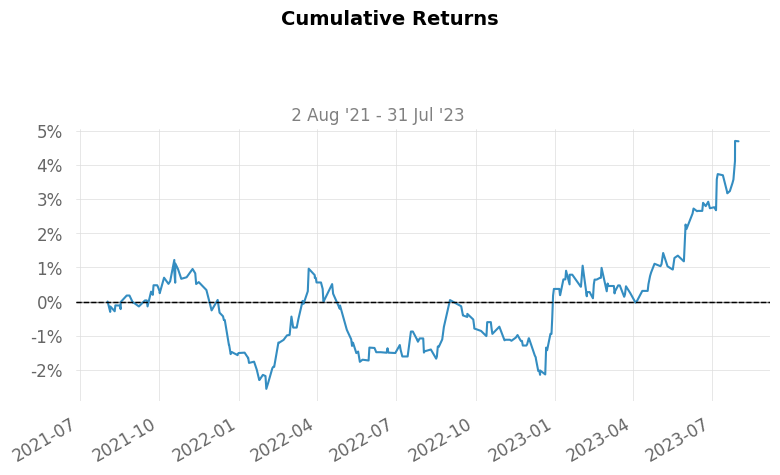

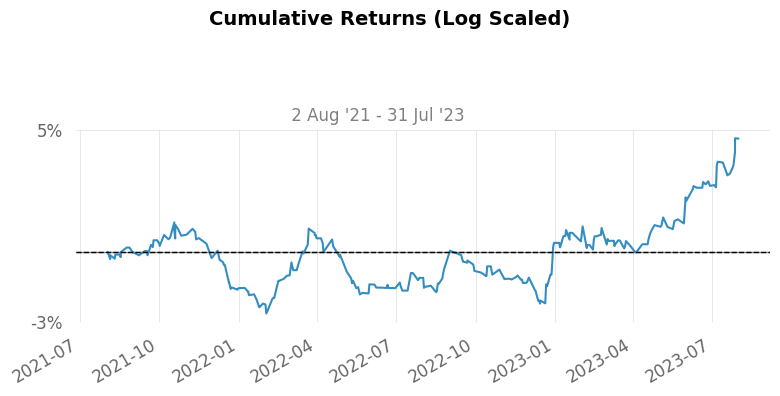

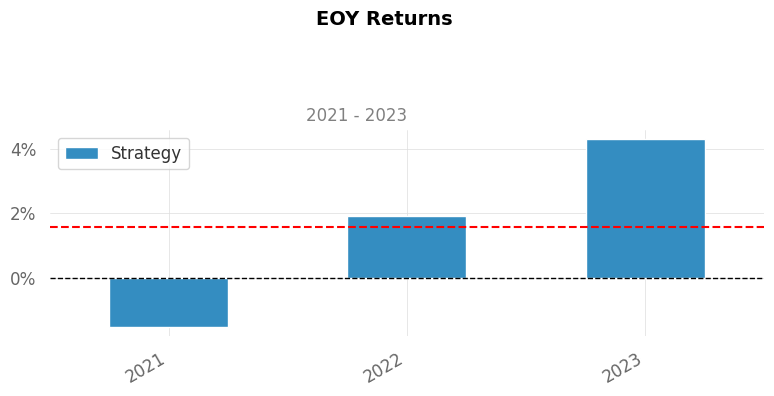

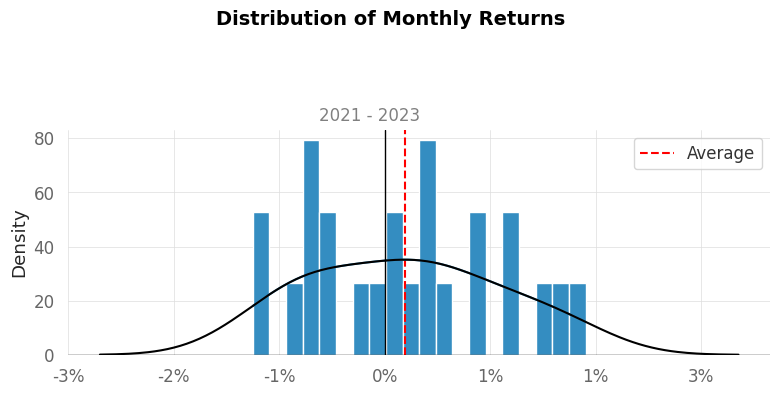

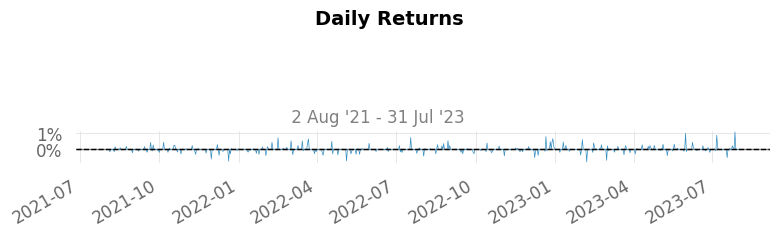

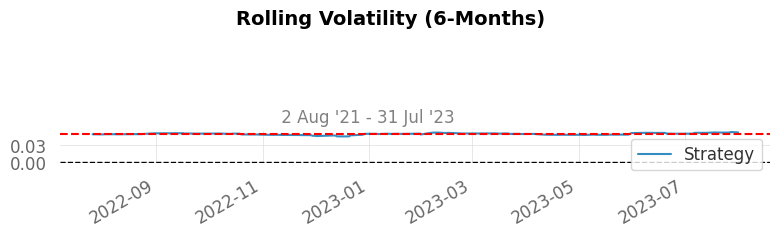

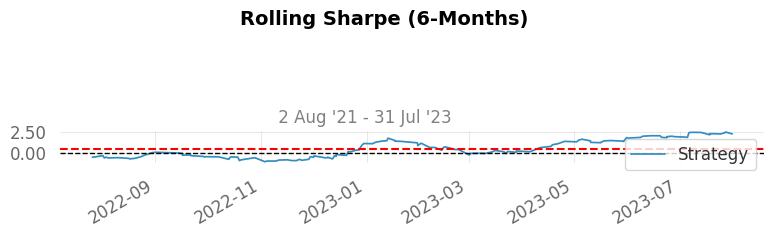

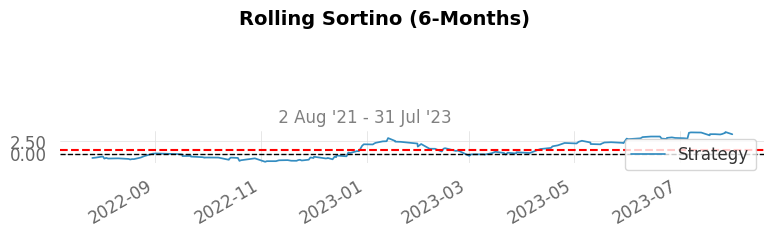

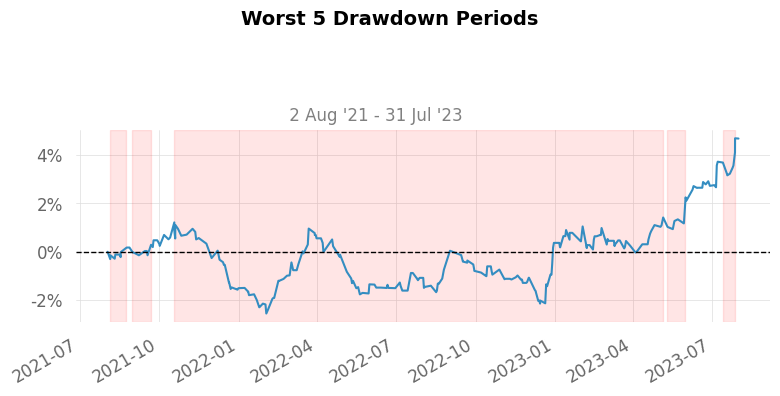

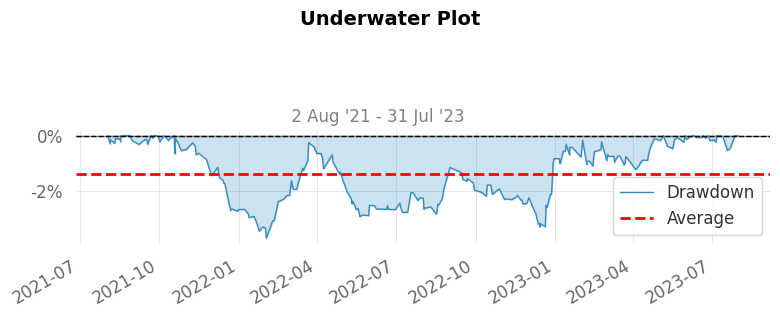

/home/prithvirajgotepatil/projects/venvs/jupyter_us_env/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


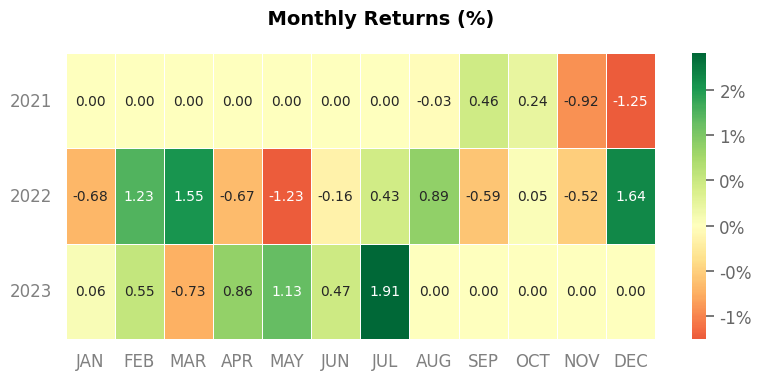

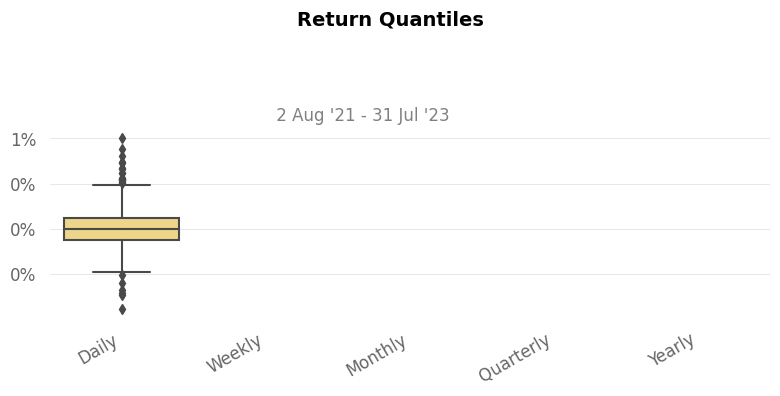

/home/prithvirajgotepatil/projects/venvs/jupyter_us_env/lib/python3.10/site-packages/quantstats/stats.py:983: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


In [19]:
connection.get_backtesting_report_statistics(strategy, report='full', html_dump=True, initial_funds=initial_virtual_funds)

### Order History

In [20]:
order_history = connection.get_backtesting_report_order_history(strategy)
print(order_history)



+-----------------+---------------------------+----------------------------------+------+
| INST            | TIME                      | ID                               | TT   |
|-----------------+---------------------------+----------------------------------+------|
| NSE_EQ:AXISBANK | 2021-08-02 10:15:00+05:30 | 5366edbc362a45ce82aeaee522f439e5 | BUY  |
+-----------------+---------------------------+----------------------------------+------+
+----+---------------------------+------------------------+-------+
|    | TIME                      | STATE                  | MSG   |
|----+---------------------------+------------------------+-------|
|  0 | 2021-08-02 10:15:00+05:30 | PUT ORDER REQ RECEIVED |       |
|  1 | 2021-08-02 10:15:00+05:30 | VALIDATION PENDING     |       |
|  2 | 2021-08-02 10:15:00+05:30 | OPEN PENDING           |       |
|  3 | 2021-08-02 10:15:00+05:30 | OPEN                   |       |
|  4 | 2021-08-02 10:15:00+05:30 | COMPLETE               |       |
+---

---

## Papertrading

### Start

In [ ]:
connection.papertrade(
    strategy=strategy, 
    start='9:15 +0530', 
    end='15:00 +0530',  
    instruments='NSE:SBIN', 
    lots=5,
    parameters=parameters, 
    candle='1 minute',
)

### Status

In [ ]:
connection.get_papertrading_job_status(strategy)

### Logs

In [ ]:
logs = connection.get_papertrading_logs(strategy)
print(logs)

### Stop

In [ ]:
connection.stop_papertrading_job(strategy)

### Profit and Loss Reports (Paper Trading)

In [ ]:
pnl_reports = connection.get_papertrading_report_pnl_table(strategy)
pnl_reports

### Statistics Reports (Paper Trading)

#### Statistics

In [ ]:
connection.get_papertrading_report_statistics(strategy)

#### Quantstats Full Report

In [ ]:
connection.get_papertrading_report_statistics(strategy, mode='quantstats', report='full', html_dump=True)

### Order History (Paper Trading)

In [ ]:
order_history = connection.get_papertrading_report_order_history(strategy)
print(order_history)

---